In [1]:
import random, os, tqdm, time, json, re
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from datetime import datetime

import sys
random.seed(618)
np.random.seed(907)

sys.path.append("../../")
new_base_path = os.path.join(
    "/mnt/d/forCoding_data/",
    "/".join(
        os.getcwd().split("/")[-1*(len(sys.path[-1].split("/")) - 1):]
    ),
)
# sys.path.append("..\\..\\")
# new_base_path = os.path.join(
#     "D:\\forCoding_data\\",
#     "\\".join(
#         os.getcwd().split("\\")[-1*(len(sys.path[-1].split("\\")) - 1):]
#     ),
# )

print("storage dir:", new_base_path)
print("code dir:", os.getcwd())

storage dir: /mnt/d/forCoding_data/ML_runCodeFromBook/深入浅出图神经网络
code dir: /mnt/d/forCoding_code/ML_runCodeFromBook/深入浅出图神经网络


In [2]:
## 创建文件夹。
if not os.path.exists(new_base_path):
    os.makedirs(
        new_base_path
    )
if not os.path.exists(os.path.join(new_base_path, "preprocessedData")):
    os.makedirs(
        os.path.join(new_base_path, "preprocessedData")
    )
if not os.path.exists(os.path.join(new_base_path, "originalData")):
    os.makedirs(
        os.path.join(new_base_path, "originalData")
    )
if not os.path.exists(os.path.join(new_base_path, "trained_models")):
    os.makedirs(
        os.path.join(new_base_path, "trained_models")
    )

def create_originalData_path(filename_or_path):
    return os.path.join(new_base_path, "originalData", filename_or_path)
def create_preprocessedData_path(filename_or_path):
    return os.path.join(new_base_path, "preprocessedData", filename_or_path)
def create_trained_models_path(filename_or_path):
    return os.path.join(new_base_path, "trained_models", filename_or_path)

def millisec2datetime(timestamp):
    time_local = time.localtime(timestamp/1000)
    return time.strftime("%Y-%m-%d %H:%M:%S", time_local)
    
def run_finish():
    # 假设你的字体文件是 'myfont.ttf' 并且位于当前目录下  
    font = FontProperties(fname="/Users/minkexiu/Documents/GitHub/ML_Tryout/SimHei.ttf", size=24)  
    # 创建一个空白的图形  
    fig, ax = plt.subplots()  
    ax.imshow(
        plt.imread("/Users/minkexiu/Downloads/wallhaven-dgxpyg.jpg")
    )
    # 在图形中添加文字  
    ax.text(
        ax.get_xlim()[1] * 0.5, 
        ax.get_ylim()[0] * 0.5, 
        f"程序于这个点跑完：\n{millisec2datetime(time.time()*1000)}", fontproperties=font, ha="center", va="center", color="red"
    )  
    # 设置图形的布局  
    # ax.set_xlim(0, 1)  
    # ax.set_ylim(0, 1)  
    ax.set_xticks([])  
    ax.set_yticks([])  
    ax.patch.set_color("blue")
    # 显示图形  
    plt.show()
        
tqdm.tqdm.pandas() ## 引入这个，就可以在apply的时候用progress_apply了。

import IPython
def kill_current_kernel():
    '''杀死当前的kernel释放内存空间。'''
    IPython.Application.instance().kernel.do_shutdown(True) 
    
def simply_show_data(df1):
    print(df1.shape)
    display(df1.head())
    
def wait_flag(saved_flag_path, time_interval_sec=10):
    print("waiting for", saved_flag_path)
    time_count = 0
    while True:
        if os.path.exists(saved_flag_path):
            break
        time.sleep(time_interval_sec)
        time_count+=time_interval_sec
        print(time_count, end=" ")
    print("finish!!")

def parallelly_run_multiple_similar_python_code(codes, nb_workers = 4):
    '''
    codes是多条相似的python代码。
    这个函数的作用就是将其平行地跑，每一条python代码就对应一个线程。或许可以后续优化，比如固定线程数为一个特定值。
    nb_workers 如果赋值为
    '''
    assert (isinstance(nb_workers, int)), "`nb_workers' should be int."
    df_sqls = pd.DataFrame(
        {
            "func": codes

        }
    )
    display(df_sqls)
    from pandarallel import pandarallel
    pandarallel.initialize(nb_workers = df_sqls.shape[0] if nb_workers<0 else nb_workers, progress_bar = True)
    def run_sql_prlly(row):
        try: 
            cmd = f'{row["func"]}'
            print(cmd, "\n")
            eval(cmd)
            return "0-success"
        except Exception as e:
            return e
    df_sqls["run_rsts"] = df_sqls.parallel_apply(lambda row: run_sql_prlly(row), axis = 1)
    display(df_sqls)
    
def create_originalData_path(filename_or_path):
    return os.path.join(new_base_path, "originalData", filename_or_path)
def create_preprocessedData_path(filename_or_path):
    return os.path.join(new_base_path, "preprocessedData", filename_or_path)
def create_trained_models_path(filename_or_path):
    return os.path.join(new_base_path, "trained_models", filename_or_path)
    
class TimerContext:  
    def __enter__(self):  
        self.start_time = str(datetime.now())
        print("start time:", self.start_time)
        return self  
    def __exit__(self, exc_type, exc_val, exc_tb):  
        print("start time:", self.start_time)
        print("end time", str(datetime.now()))

def three_num_get_gua(a, b, c):
    '''梅花易数三数起卦，以取本、互、变。'''
    bagua = ["111", "110", "101", "100", "011", "010", "001", "000"]
    guatu = {
        "111": ("☰", "天", "乾金"), 
        "110": ("☱", "泽", "兑金"),
        "101": ("☲", "火", "离火"),
        "100": ("☳" , "雷", "震木"),
        "011": ("☴", "风", "巽木"),
        "010": ("☵", "水", "坎水"),
        "001": ("☶", "山", "艮土"),
        "000": ("☷", "地", "坤土"),
    }
    shanggua_idx = 7 if (a % 8 == 0) else (a % 8 - 1)
    xiagua_idx = 7 if (b % 8 == 0) else (b % 8 - 1)
    bianyao_idx = 5 if (c % 6 == 0) else (c % 6 - 1)
    bengua = bagua[xiagua_idx] + bagua[shanggua_idx]
    hugua = bengua[1:-1][:3] + bengua[1:-1][1:]
    biangua = list(bengua)
    biangua[bianyao_idx] = str(1 - int(biangua[bianyao_idx]))
    biangua = "".join(biangua)
    df = pd.DataFrame([[
        guatu[bengua[3:]][0]+guatu[bengua[3:]][2], guatu[hugua[3:]][0]+guatu[hugua[3:]][2], guatu[biangua[3:]][0]+guatu[biangua[3:]][2], 
    ],[
        guatu[bengua[:3]][0]+guatu[bengua[:3]][2], guatu[hugua[:3]][0]+guatu[hugua[:3]][2], guatu[biangua[:3]][0]+guatu[biangua[:3]][2], 
    ]], index=["上卦", "下卦"], columns = [
        guatu[bengua[3:]][1] + guatu[bengua[:3]][1],
        guatu[hugua[3:]][1] + guatu[hugua[:3]][1],
        guatu[biangua[3:]][1] + guatu[biangua[:3]][1],
    ])
    display(df)
    return bengua, hugua, biangua
    
def easy_start_gua():
    """用公历的日、时、分来起卦。"""
    n1, n2, n3 = str(datetime.now())[8:10], str(datetime.now())[11:13], str(datetime.now())[14:16]
    print(n1, n2, n3)
    return three_num_get_gua(int(n1), int(n2), int(n3))
easy_start_gua()

import zhdate
def easy_start_gua_lunar():
    '''用农历的月、日、时辰来起卦。'''
    time_now = datetime.now()
    zh_date_str = str(zhdate.ZhDate.from_datetime(time_now))
    zh_date_str_1 = datetime.strftime(
        datetime(
            *[int(x) for x in re.findall("\d+", zh_date_str)]
        ),
        '%Y-%m-%d'
    )
    zh_hour = (time_now.hour + 1)//2%12+1
    zh_hour_dizhi = "子、丑、寅、卯、辰、巳、午、未、申、酉、戌、亥".split("、")[zh_hour-1]
    
    n1, n2, n3 = zh_date_str_1[5:7], zh_date_str_1[8:10], zh_hour
    print(n1, n2, n3, f"{zh_hour_dizhi}时")
    return three_num_get_gua(int(n1), int(n2), int(n3))
easy_start_gua_lunar()

20 14 05


,雷水,水火,泽水
上卦,☳震木,☵坎水,☱兑金
下卦,☵坎水,☲离火,☵坎水


08 18 8 未时


,地泽,地雷,地雷
上卦,☷坤土,☷坤土,☷坤土
下卦,☱兑金,☳震木,☳震木


('110000', '100000', '100000')

In [24]:
## 参考代码：https://developer.aliyun.com/article/1208980
## 数据来源：https://github.com/tkipf/pygcn/tree/master

In [3]:
from pathlib import Path # 引入提升路径的兼容性
# 引入矩阵运算的相关库
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix,csr_matrix,diags,eye
# 引入深度学习框架库
import torch
from torch import nn
import torch.nn.functional as F
# 引入绘图库
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
# 1.1 导入基础模块，并设置运行环境
# 输出计算资源情况
device = torch.device('cuda')if torch.cuda.is_available() else torch.device('cpu')
print(device) # 输出 cuda

cuda


In [5]:
# 输出样本路径
path = Path(create_originalData_path("cora"))
print(path) # 输出 cuda

/mnt/d/forCoding_data/ML_runCodeFromBook/深入浅出图神经网络/originalData/cora


In [6]:
path/'cora.content'

PosixPath('/mnt/d/forCoding_data/ML_runCodeFromBook/深入浅出图神经网络/originalData/cora/cora.content')

In [8]:
# 1.2 读取并解析论文数据
# 读取论文内容数据，将其转化为数据
paper_features_label = np.genfromtxt(path/'cora.content',dtype=np.str_) # 使用Path对象的路径构造，实例化的内容为cora.content。path/'cora.content'表示路径为'data/cora/cora.content'的字符串
print(paper_features_label,np.shape(paper_features_label)) # 打印数据集内容与数据的形状

[['31336' '0' '0' ... '0' '0' 'Neural_Networks']
 ['1061127' '0' '0' ... '0' '0' 'Rule_Learning']
 ['1106406' '0' '0' ... '0' '0' 'Reinforcement_Learning']
 ...
 ['1128978' '0' '0' ... '0' '0' 'Genetic_Algorithms']
 ['117328' '0' '0' ... '0' '0' 'Case_Based']
 ['24043' '0' '0' ... '0' '0' 'Neural_Networks']] (2708, 1435)


In [9]:
# 取出数据集中的第一列:论文ID
papers = paper_features_label[:,0].astype(np.int32)
print("论文ID序列：",papers) # 输出所有论文ID
# 论文重新编号，并将其映射到论文ID中，实现论文的统一管理
paper2idx = {k:v for v,k in enumerate(papers)}

论文ID序列： [  31336 1061127 1106406 ... 1128978  117328   24043]


In [10]:
# 将数据中间部分的字标签取出，转化成矩阵
features = csr_matrix(paper_features_label[:,1:-1],dtype=np.float32)
print("字标签矩阵的形状：",np.shape(features)) # 字标签矩阵的形状

字标签矩阵的形状： (2708, 1433)


In [11]:
# 将数据的最后一项的文章分类属性取出，转化为分类的索引
labels = paper_features_label[:,-1]
lbl2idx = { k:v for v,k in enumerate(sorted(np.unique(labels)))}
labels = [lbl2idx[e] for e in labels]
print("论文类别的索引号：",lbl2idx,labels[:5])

论文类别的索引号： {'Case_Based': 0, 'Genetic_Algorithms': 1, 'Neural_Networks': 2, 'Probabilistic_Methods': 3, 'Reinforcement_Learning': 4, 'Rule_Learning': 5, 'Theory': 6} [2, 5, 4, 4, 3]


In [12]:
# 1.3 读取并解析论文关系数据
# 读取论文关系数据，并将其转化为数据
edges = np.genfromtxt(path/'cora.cites',dtype=np.int32) # 将数据集中论文的引用关系以数据的形式读入
print(edges,np.shape(edges))
# 转化为新编号节点间的关系：将数据集中论文ID表示的关系转化为重新编号后的关系
edges = np.asarray([paper2idx[e] for e in edges.flatten()],np.int32).reshape(edges.shape)
print("新编号节点间的对应关系：",edges,edges.shape)
# 计算邻接矩阵，行与列都是论文个数：由论文引用关系所表示的图结构生成邻接矩阵。
adj = coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),shape=(len(labels), len(labels)), dtype=np.float32)
# 生成无向图对称矩阵：将有向图的邻接矩阵转化为无向图的邻接矩阵。Tip：转化为无向图的原因：主要用于对论文的分类，论文的引用关系主要提供单个特征之间的关联，故更看重是不是有关系，所以无向图即可。
adj_long = adj.multiply(adj.T < adj)
adj = adj_long + adj_long.T

[[     35    1033]
 [     35  103482]
 [     35  103515]
 ...
 [ 853118 1140289]
 [ 853155  853118]
 [ 954315 1155073]] (5429, 2)
新编号节点间的对应关系： [[ 163  402]
 [ 163  659]
 [ 163 1696]
 ...
 [1887 2258]
 [1902 1887]
 [ 837 1686]] (5429, 2)


In [13]:
# 1.4 加工图结构的矩阵数据
def normalize_adj(mx):
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum,-0.5).flatten()
    r_inv[np.isinf(r_inv)] = 0.0
    r_mat_inv = diags(r_inv)
    return mx.dot(r_mat_inv).transpose().dot(r_mat_inv) # 兑成归一化拉普拉斯矩阵实现邻接矩阵的转化
 
adj = normalize_adj(adj + eye(adj.shape[0])) # 对邻接矩阵进行转化对称归一化拉普拉斯矩阵转化

In [14]:
# 1.5 将数据转化为张量，并分配运算资源
adj = torch.FloatTensor(adj.todense()) # 节点间关系 todense()方法将其转换回稠密矩阵。
features = torch.FloatTensor(features.todense()) # 节点自身的特征
labels = torch.LongTensor(labels) # 对每个节点的分类标签

In [15]:
# 划分数据集
n_train = 200 # 训练数据集大小
n_val = 300 # 验证数据集大小
n_test = len(features) - n_train - n_val # 测试数据集大小
np.random.seed(34)
idxs = np.random.permutation(len(features)) # 将原有的索引打乱顺序

In [16]:
# 计算每个数据集的索引
idx_train = torch.LongTensor(idxs[:n_train]) # 根据指定训练数据集的大小并划分出其对应的训练数据集索引
idx_val = torch.LongTensor(idxs[n_train:n_train+n_val])# 根据指定验证数据集的大小并划分出其对应的验证数据集索引
idx_test = torch.LongTensor(idxs[n_train+n_val:])# 根据指定测试数据集的大小并划分出其对应的测试数据集索引

In [17]:
# 分配运算资源
adj = adj.to(device)
features = features.to(device)
labels = labels.to(device)
idx_train = idx_train.to(device)
idx_val = idx_val.to(device)
idx_test = idx_test.to(device)

In [18]:
# 1.6 定义Mish激活函数与图注意力层类
def mish(x): # 性能优于RElu函数
    return x * (torch.tanh(F.softplus(x)))
# 图注意力层类
class GraphAttentionLayer(nn.Module): # 图注意力层
    # 初始化
    def __init__(self,in_features,out_features,dropout=0.6):
        super(GraphAttentionLayer, self).__init__()
        self.dropout = dropout
        self.in_features = in_features # 定义输入特征维度
        self.out_features = out_features # 定义输出特征维度
        self.W = nn.Parameter(torch.zeros(size=(in_features,out_features)))
        nn.init.xavier_uniform_(self.W) # 初始化全连接权重
        self.a = nn.Parameter(torch.zeros(size=(2 * out_features,1)))
        nn.init.xavier_uniform_(self.a) # 初始化注意力权重
 
    def forward(self,input,adj):
        h = torch.mm(input,self.W) # 全连接处理
        N = h.size()[0]
        # 对全连接后的特征数据分别进行基于批次维度和特征维度的复制，并将复制结果连接在一起。
        # 这种操作使得顶点中的特征数据进行了充分的排列组合，结果中的每行信息都包含两个顶点特征。接下来的注意力机制便是基于每对顶点特征进行计算的。
        a_input = torch.cat([h.repeat(1,N).view(N * N ,-1),h.repeat(N,1)],dim=1).view(N,-1,2 * self.out_features) # 主要功能将顶点特征两两搭配，连接在一起，生成数据形状[N,N,2 * self.out_features]
        e = mish(torch.matmul(a_input,self.a).squeeze(2)) # 计算注意力
 
        zero_vec = -9e15 * torch.ones_like(e) # 初始化最小值：该值用于填充被过滤掉的特征对象atenion。如果在过滤时，直接对过滤排的特征赋值为0，那么模型会无法收敛。
        attention = torch.where(adj>0,e,zero_vec) # 过滤注意力 ：按照邻接矩阵中大于0的边对注意力结果进行过滤，使注意力按照图中的顶点配对的范围进行计算。
        attention = F.softmax(attention,dim=1) # 对注意力分数进行归一化：使用F.Sofmax()函数对最终的注意力机制进行归一化，得到注意力分数(总和为1)。
        attention = F.dropout(attention,self.dropout,training=self.training)
        h_prime = torch.matmul(attention,h) # 使用注意力处理特征：将最终的注意力作用到全连接的结果上以完成计算。
        return mish(h_prime)

In [19]:
# 1.7 搭建图注意力模型
class GAT(nn.Module):# 图注意力模型类
    def __init__(self,nfeat,nclasses,nhid,dropout,nheads): # 图注意力模型类的初始化方法，支持多套注意力机制同时运算，其参数nheads用于指定注意力的计算套数。
        super(GAT, self).__init__()
        # 注意力层
        self.attentions = [GraphAttentionLayer(nfeat,nhid,dropout) for _ in range(nheads)] # 按照指定的注意力套数生成多套注意力层
        for i , attention in enumerate(self.attentions): # 将注意力层添加到模型
            self.add_module('attention_{}'.format(i),attention)
        # 输出层
        self.out_att = GraphAttentionLayer(nhid * nheads,nclasses,dropout)
 
    def forward(self,x,adj): # 定义正向传播方法
        x = torch.cat([att(x, adj) for att in self.attentions], dim=1)
        return self.out_att(x, adj)
 
 
n_labels = labels.max().item() + 1 # 获取分类个数7
n_features = features.shape[1] # 获取节点特征维度 1433
print(n_labels,n_features) # 输出7与1433
 
def accuracy(output,y): # 定义函数计算准确率
    return (output.argmax(1) == y).type(torch.float32).mean().item()
 
### 定义函数来实现模型的训练过程。与深度学习任务不同，图卷积在训练时需要传入样本间的关系数据。
# 因为该关系数据是与节点数相等的方阵，所以传入的样本数也要与节点数相同，在计算loss值时，可以通过索引从总的运算结果中取出训练集的结果。
def step(): # 定义函数来训练模型 Tip：在图卷积任务中，无论是用模型进行预测还是训练，都需要将全部的图结构方阵输入
    model.train()
    optimizer.zero_grad()
    output = model(features,adj) # 将全部数据载入模型，只用训练数据计算损失
    loss = F.cross_entropy(output[idx_train],labels[idx_train])
    acc = accuracy(output[idx_train],labels[idx_train]) # 计算准确率
    loss.backward()
    optimizer.step()
    return loss.item(),acc
 
def evaluate(idx): # 定义函数来评估模型 Tip：在图卷积任务中，无论是用模型进行预测还是训练，都需要将全部的图结构方阵输入
    model.eval()
    output = model(features, adj) # 将全部数据载入模型，用指定索引评估模型结果
    loss = F.cross_entropy(output[idx], labels[idx]).item()
    return loss, accuracy(output[idx], labels[idx])

7 1433


In [21]:
import math
import torch
from torch.optim.optimizer import Optimizer, required
import itertools as it

class Ranger(Optimizer):
 
    def __init__(self, params, lr=1e-3, alpha=0.5, k=6, N_sma_threshhold=5, betas=(.95,0.999), eps=1e-5, weight_decay=0):
        #parameter checks
        if not 0.0 <= alpha <= 1.0:
            raise ValueError(f'Invalid slow update rate: {alpha}')
        if not 1 <= k:
            raise ValueError(f'Invalid lookahead steps: {k}')
        if not lr > 0:
            raise ValueError(f'Invalid Learning Rate: {lr}')
        if not eps > 0:
            raise ValueError(f'Invalid eps: {eps}')
 
        #parameter comments:
        # beta1 (momentum) of .95 seems to work better than .90...
        #N_sma_threshold of 5 seems better in testing than 4.
        #In both cases, worth testing on your dataset (.90 vs .95, 4 vs 5) to make sure which works best for you.
 
        #prep defaults and init torch.optim base
        defaults = dict(lr=lr, alpha=alpha, k=k, step_counter=0, betas=betas, N_sma_threshhold=N_sma_threshhold, eps=eps, weight_decay=weight_decay)
        super().__init__(params,defaults)
 
        #adjustable threshold
        self.N_sma_threshhold = N_sma_threshhold
 
        #now we can get to work...
        #removed as we now use step from RAdam...no need for duplicate step counting
        #for group in self.param_groups:
        #    group["step_counter"] = 0
            #print("group step counter init")
 
        #look ahead params
        self.alpha = alpha
        self.k = k 
 
        #radam buffer for state
        self.radam_buffer = [[None,None,None] for ind in range(10)]
 
        #self.first_run_check=0
 
        #lookahead weights
        #9/2/19 - lookahead param tensors have been moved to state storage.  
        #This should resolve issues with load/save where weights were left in GPU memory from first load, slowing down future runs.
 
        #self.slow_weights = [[p.clone().detach() for p in group['params']]
        #                     for group in self.param_groups]
 
        #don't use grad for lookahead weights
        #for w in it.chain(*self.slow_weights):
        #    w.requires_grad = False
 
    def __setstate__(self, state):
        print("set state called")
        super(Ranger, self).__setstate__(state)
 
 
    def step(self, closure=None):
        loss = None
        #note - below is commented out b/c I have other work that passes back the loss as a float, and thus not a callable closure.  
        #Uncomment if you need to use the actual closure...
 
        #if closure is not None:
            #loss = closure()
 
        #Evaluate averages and grad, update param tensors
        for group in self.param_groups:
 
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('Ranger optimizer does not support sparse gradients')
 
                p_data_fp32 = p.data.float()
 
                state = self.state[p]  #get state dict for this param
 
                if len(state) == 0:   #if first time to run...init dictionary with our desired entries
                    #if self.first_run_check==0:
                        #self.first_run_check=1
                        #print("Initializing slow buffer...should not see this at load from saved model!")
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
 
                    #look ahead weight storage now in state dict 
                    state['slow_buffer'] = torch.empty_like(p.data)
                    state['slow_buffer'].copy_(p.data)
 
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)
 
                #begin computations 
                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']
 
                #compute variance mov avg
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                #compute mean moving avg
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
 
                state['step'] += 1
 
 
                buffered = self.radam_buffer[int(state['step'] % 10)]
                if state['step'] == buffered[0]:
                    N_sma, step_size = buffered[1], buffered[2]
                else:
                    buffered[0] = state['step']
                    beta2_t = beta2 ** state['step']
                    N_sma_max = 2 / (1 - beta2) - 1
                    N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)
                    buffered[1] = N_sma
                    if N_sma > self.N_sma_threshhold:
                        step_size = math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    else:
                        step_size = 1.0 / (1 - beta1 ** state['step'])
                    buffered[2] = step_size
 
                if group['weight_decay'] != 0:
                    p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
 
                if N_sma > self.N_sma_threshhold:
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size * group['lr'], exp_avg, denom)
                else:
                    p_data_fp32.add_(-step_size * group['lr'], exp_avg)
 
                p.data.copy_(p_data_fp32)
 
                #integrated look ahead...
                #we do it at the param level instead of group level
                if state['step'] % group['k'] == 0:
                    slow_p = state['slow_buffer'] #get access to slow param tensor
                    slow_p.add_(self.alpha, p.data - slow_p)  #(fast weights - slow weights) * alpha
                    p.data.copy_(slow_p)  #copy interpolated weights to RAdam param tensor
 
        return loss

  0%|                                                                                          | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_22122/2405757854.py:105: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value = 1) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1581.)
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
  0%|▏                                                                                 | 2/1000 [00:01<07:28,  2.23it/s]

     1/1000: train_loss=1.9378, train_acc=0.1800, val_loss=1.9398, val_acc=0.1533


  5%|████▏                                                                            | 51/1000 [00:07<02:37,  6.03it/s]

    50/1000: train_loss=1.8712, train_acc=0.6100, val_loss=1.8892, val_acc=0.5367


 10%|████████                                                                        | 101/1000 [00:15<02:29,  6.02it/s]

   100/1000: train_loss=1.6865, train_acc=0.7250, val_loss=1.7523, val_acc=0.6067


 15%|████████████                                                                    | 151/1000 [00:22<02:20,  6.03it/s]

   150/1000: train_loss=1.3978, train_acc=0.8000, val_loss=1.5460, val_acc=0.6967


 20%|████████████████                                                                | 201/1000 [00:29<02:12,  6.02it/s]

   200/1000: train_loss=0.9848, train_acc=0.9400, val_loss=1.2558, val_acc=0.7667


 25%|████████████████████                                                            | 251/1000 [00:36<02:04,  6.01it/s]

   250/1000: train_loss=0.6061, train_acc=0.9600, val_loss=0.9811, val_acc=0.8067


 30%|████████████████████████                                                        | 301/1000 [00:43<01:56,  6.02it/s]

   300/1000: train_loss=0.3714, train_acc=0.9750, val_loss=0.8074, val_acc=0.8100


 35%|████████████████████████████                                                    | 351/1000 [00:50<01:47,  6.01it/s]

   350/1000: train_loss=0.2066, train_acc=0.9800, val_loss=0.7028, val_acc=0.8033


 40%|████████████████████████████████                                                | 401/1000 [00:57<01:39,  6.02it/s]

   400/1000: train_loss=0.1110, train_acc=0.9900, val_loss=0.6631, val_acc=0.7967


 45%|████████████████████████████████████                                            | 451/1000 [01:04<01:31,  5.98it/s]

   450/1000: train_loss=0.0678, train_acc=1.0000, val_loss=0.6474, val_acc=0.8100


 50%|████████████████████████████████████████                                        | 501/1000 [01:12<01:23,  6.00it/s]

   500/1000: train_loss=0.0413, train_acc=1.0000, val_loss=0.6513, val_acc=0.8100


 55%|████████████████████████████████████████████                                    | 551/1000 [01:19<01:14,  6.02it/s]

   550/1000: train_loss=0.0271, train_acc=1.0000, val_loss=0.6605, val_acc=0.8033


 60%|████████████████████████████████████████████████                                | 601/1000 [01:26<01:06,  6.02it/s]

   600/1000: train_loss=0.0195, train_acc=1.0000, val_loss=0.6765, val_acc=0.8000


 65%|████████████████████████████████████████████████████                            | 651/1000 [01:33<00:57,  6.03it/s]

   650/1000: train_loss=0.0141, train_acc=1.0000, val_loss=0.6831, val_acc=0.7967


 70%|████████████████████████████████████████████████████████                        | 701/1000 [01:40<00:49,  6.02it/s]

   700/1000: train_loss=0.0103, train_acc=1.0000, val_loss=0.6946, val_acc=0.8000


 75%|████████████████████████████████████████████████████████████                    | 751/1000 [01:47<00:41,  6.01it/s]

   750/1000: train_loss=0.0082, train_acc=1.0000, val_loss=0.7107, val_acc=0.7967


 80%|████████████████████████████████████████████████████████████████                | 801/1000 [01:54<00:33,  6.03it/s]

   800/1000: train_loss=0.0064, train_acc=1.0000, val_loss=0.7165, val_acc=0.8000


 85%|████████████████████████████████████████████████████████████████████            | 851/1000 [02:01<00:24,  6.03it/s]

   850/1000: train_loss=0.0051, train_acc=1.0000, val_loss=0.7264, val_acc=0.8000


 90%|████████████████████████████████████████████████████████████████████████        | 901/1000 [02:09<00:16,  5.99it/s]

   900/1000: train_loss=0.0042, train_acc=1.0000, val_loss=0.7357, val_acc=0.7967


 95%|████████████████████████████████████████████████████████████████████████████    | 951/1000 [02:16<00:08,  6.03it/s]

   950/1000: train_loss=0.0033, train_acc=1.0000, val_loss=0.7532, val_acc=0.7967


100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:23<00:00,  6.99it/s]

  1000/1000: train_loss=0.0027, train_acc=1.0000, val_loss=0.7758, val_acc=0.7867
Train     : loss=0.0027, accuracy=1.0000
Validation: loss=0.7758, accuracy=0.7867
Test      : loss=0.8287, accuracy=0.7835


                     Real                    Pred
0      Genetic_Algorithms      Genetic_Algorithms
1      Genetic_Algorithms      Genetic_Algorithms
2                  Theory                  Theory
3   Probabilistic_Methods   Probabilistic_Methods
4  Reinforcement_Learning   Probabilistic_Methods
5              Case_Based                  Theory
6  Reinforcement_Learning  Reinforcement_Learning
7      Genetic_Algorithms      Genetic_Algorithms
8         Neural_Networks         Neural_Networks
9           Rule_Learning           Rule_Learning


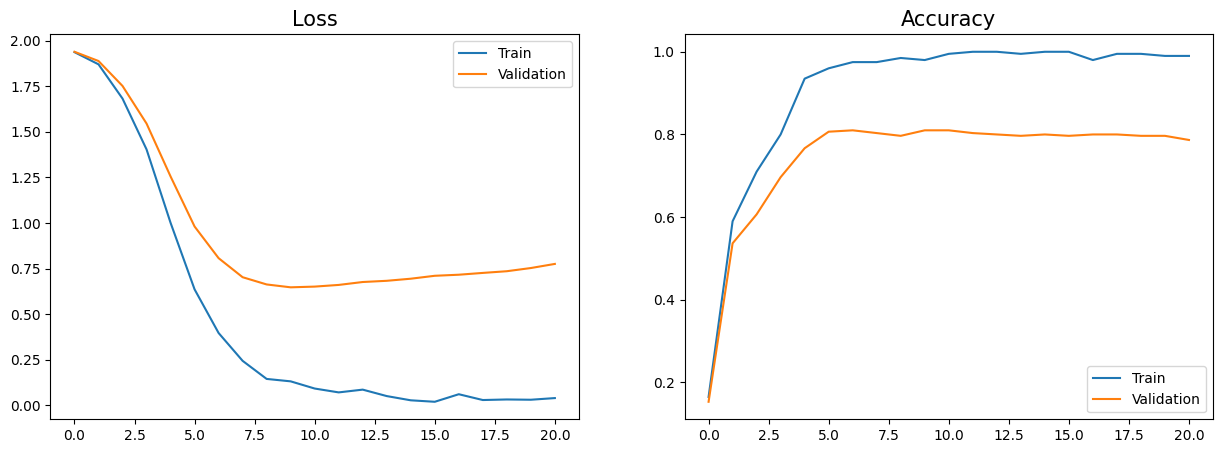

In [23]:
# 1.8 使用Ranger优化器训练模型并可视化
model = GAT(n_features, n_labels, 16,0.1,8).to(device) # 向GAT传入的后3个参数分别代表输出维度(16）、Dropout的丢弃率（0.1）、注意力的计算套数（8）
 
from tqdm import tqdm
# from Cora_ranger import * # 引入Ranger优化器
optimizer = Ranger(model.parameters()) # 使用Ranger优化器
 
# 训练模型
epochs = 1000
print_steps = 50
train_loss, train_acc = [], []
val_loss, val_acc = [], []
for i in tqdm(range(epochs)):
    tl,ta = step()
    train_loss = train_loss + [tl]
    train_acc = train_acc + [ta]
    if (i+1) % print_steps == 0 or i == 0:
        tl,ta = evaluate(idx_train)
        vl,va = evaluate(idx_val)
        val_loss = val_loss + [vl]
        val_acc = val_acc + [va]
        print(f'{i + 1:6d}/{epochs}: train_loss={tl:.4f}, train_acc={ta:.4f}' + f', val_loss={vl:.4f}, val_acc={va:.4f}')
 
# 输出最终结果
final_train, final_val, final_test = evaluate(idx_train), evaluate(idx_val), evaluate(idx_test)
print(f'Train     : loss={final_train[0]:.4f}, accuracy={final_train[1]:.4f}')
print(f'Validation: loss={final_val[0]:.4f}, accuracy={final_val[1]:.4f}')
print(f'Test      : loss={final_test[0]:.4f}, accuracy={final_test[1]:.4f}')
 
# 可视化训练过程
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = axes[0]
axes[0].plot(train_loss[::print_steps] + [train_loss[-1]], label='Train')
axes[0].plot(val_loss, label='Validation')
axes[1].plot(train_acc[::print_steps] + [train_acc[-1]], label='Train')
axes[1].plot(val_acc, label='Validation')
for ax,t in zip(axes, ['Loss', 'Accuracy']): ax.legend(), ax.set_title(t, size=15)
 
# 输出模型的预测结果
output = model(features, adj)
samples = 10
idx_sample = idx_test[torch.randperm(len(idx_test))[:samples]]
# 将样本标签与预测结果进行比较
idx2lbl = {v:k for k,v in lbl2idx.items()}
df = pd.DataFrame({'Real': [idx2lbl[e] for e in labels[idx_sample].tolist()],'Pred': [idx2lbl[e] for e in output[idx_sample].argmax(1).tolist()]})
print(df)